# Poisson Statistics of Radioactive Decay
To demonstrate that radioactive decay obey Poisson statistics, by specifically using Sr-90 samples and a high voltage of 950 V.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.special import factorial
import seaborn as sns

In [2]:
# import data as a table

data_10 = pd.read_csv('exp1_10s-1_t2.tsv', sep='\t', header = 9) # reads the table of raw data for the counts at a rate of 10 s^-1
data_10.columns = ['High Voltage', 'Counts', 'Elapsed Time', 'Date/Time', 'NaN'] #column headings
#there was an extra empty column due to the separator chosen
counts_10 = data_10.Counts

data_100 = pd.read_csv('exp1_100s-1_t2.tsv', sep='\t', header = 9) # reads the table
data_100.columns = ['High Voltage', 'Counts', 'Elapsed Time', 'Date/Time', 'NaN'] #column headings
counts_100 = data_100.Counts

In [3]:
# calculate average (A), standrard deviation (s), s/A and s/sqrt(A)

A_10 = counts_10.mean() # calculate the sample mean
s_10 = counts_10.std() # calculate the sample standard deviation
print('For the count rate of 10 counts per second:')
print('A = ' + str(A_10) + ' s = ' + str(s_10) + ' s/A = '\
      + str(s_10/A_10) + ' s/sqrt(A)= ' + str(s_10/(A_10**0.5)))

A_100 = counts_100.mean()
s_100 = counts_100.std()
print('For the count rate of 100 counts per second:')
print('A = ' + str(A_100) + ' s = ' + str(s_100) + ' s/A = '\
      + str(s_100/A_100) + ' s/sqrt(A)= ' + str(s_100/(A_100**0.5)))

For the count rate of 10 counts per second:
A = 130.86 s = 12.01701175120385 s/A = 0.09183105418923924 s/sqrt(A)= 1.0504926736143978
For the count rate of 100 counts per second:
A = 2158.52 s = 47.590618180220254 s/A = 0.022047800428173125 s/sqrt(A)= 1.0243380554733303


In [4]:
# Create sorted lists of the counts WITHOUT repetition and corresponding y_values

x_10 = list( dict.fromkeys(sorted(counts_10, reverse=False))) #list for different counts of 10s^-1
x_100 = list( dict.fromkeys(sorted(counts_100, reverse=False))) #list for different counts of 10s^-1

y_10 = poisson.pmf(x_10, mu=A_10) # Probability mass function values using x_10
y_100 = poisson.pmf(x_100, mu=A_100) # Probability mass function values using x_10


<Figure size 432x288 with 0 Axes>

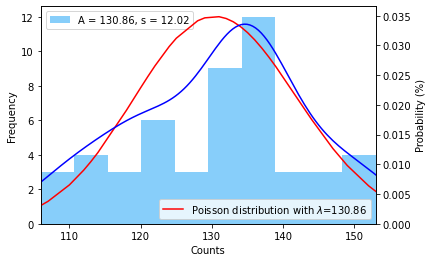

<Figure size 432x288 with 0 Axes>

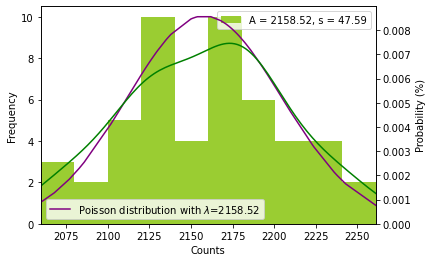

In [5]:
# plot the data

f1 = plt.figure() # plot 1
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.hist(counts_10, label = 'A = 130.86, s = 12.02', color='lightskyblue') # histogram of data
ax2.plot(x_10, y_10, label='Poisson distribution with $\lambda$=130.86', color='r') # theoretical poisson distribution
sns.kdeplot(counts_10, color='b') # fitted curve of the data
plt.xlim(min(counts_10), max(counts_10)) # set axis

# axis labels and position
ax1.set_xlabel("Counts")
ax1.set_ylabel("Frequency")
ax2.set_ylabel("Probability (%)")
ax1.legend(loc='best')
ax2.legend(loc='best')

f2 = plt.figure() # plot 2
fig, ax3 = plt.subplots()
ax4 = ax3.twinx()
ax3.hist(counts_100, label = 'A = 2158.52, s = 47.59', color='yellowgreen')
ax4.plot(x_100, y_100, label='Poisson distribution with $\lambda$=2158.52', color='purple')
sns.kdeplot(counts_100, color='g')
plt.xlim(min(counts_100), max(counts_100))

ax3.set_xlabel("Counts")
ax3.set_ylabel("Frequency")
ax4.set_ylabel("Probability (%)")
ax3.legend(loc='best')
ax4.legend(loc='best')
plt.show()